In [51]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

#Code to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [52]:
# Load the dataset
df = pd.read_csv('hepatitis.csv', na_values="?")
df.head()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1.0,2,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,2,50,1,1.0,2,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,3,2,78,1,2.0,2,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,4,2,31,1,NaN,1,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [53]:
# Check the details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          155 non-null    int64  
 1   target      155 non-null    int64  
 2   age         155 non-null    int64  
 3   gender      155 non-null    int64  
 4   steroid     154 non-null    float64
 5   antivirals  155 non-null    int64  
 6   fatigue     154 non-null    float64
 7   malaise     154 non-null    float64
 8   anorexia    154 non-null    float64
 9   liverBig    145 non-null    float64
 10  liverFirm   144 non-null    float64
 11  spleen      150 non-null    float64
 12  spiders     150 non-null    float64
 13  ascites     150 non-null    float64
 14  varices     150 non-null    float64
 15  bili        149 non-null    float64
 16  alk         126 non-null    float64
 17  sgot        151 non-null    float64
 18  albu        139 non-null    float64
 19  protime     88 non-null     f

In [54]:
# Check the statistical summary
df.describe()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
count,155.000000,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,...,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,78.000000,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,...,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,44.888751,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,...,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,39.500000,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,...,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,78.000000,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,116.500000,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,155.000000,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


In [55]:
# Check values of target column
df['target'].value_counts()

target
2    123
1     32
Name: count, dtype: int64

In [56]:
# Drop the ID column
df.drop('ID', axis=1, inplace=True)
df.head()

,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,liverFirm,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [57]:
# Check the missing values
df.isnull().sum().sort_values(ascending=False)

protime       67
alk           29
albu          16
liverFirm     11
liverBig      10
bili           6
spleen         5
spiders        5
ascites        5
varices        5
sgot           4
steroid        1
fatigue        1
malaise        1
anorexia       1
target         0
age            0
antivirals     0
gender         0
histology      0
dtype: int64

In [58]:
# Seperate the  columns into categorical and numerical 
num_cols = ["target","age", "bili", "alk", "sgot", "albu", "protime"]
cat_cols = ['gender', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liverBig', 
            'liverFirm', 'spleen', 'spiders', 'ascites', 'varices', 'histology']

In [59]:
# Impute missing values of num_cols and cat_cols by using imputer
num_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [60]:
# Concatenate num_cols and cat_cols
df = pd.concat([df[num_cols], df[cat_cols]], axis=1)

In [61]:
df.isnull().sum().sort_values(ascending=False)

target        0
age           0
varices       0
ascites       0
spiders       0
spleen        0
liverFirm     0
liverBig      0
anorexia      0
malaise       0
fatigue       0
antivirals    0
steroid       0
gender        0
protime       0
albu          0
sgot          0
alk           0
bili          0
histology     0
dtype: int64

In [62]:
# Split the data into X and y column
X = df.drop('target', axis=1)
y = df['target']

In [63]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
# Call the model
model = SVC(kernel='rbf', random_state=42)
# Train the model
model.fit(X_train, y_train)

SVC(random_state=42)

In [66]:
# Predict the model
y_pred = model.predict(X_test)
y_pred

array([2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1.])

In [67]:
# Evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  0.7096774193548387
Recall Score:  0.2857142857142857
Precision Score:  0.3333333333333333
F1 Score:  0.30769230769230765
Confusion Matrix: 
 [[ 2  5]
 [ 4 20]]
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.33      0.29      0.31         7
         2.0       0.80      0.83      0.82        24

    accuracy                           0.71        31
   macro avg       0.57      0.56      0.56        31
weighted avg       0.69      0.71      0.70        31



Text(95.72222222222221, 0.5, 'Actual')

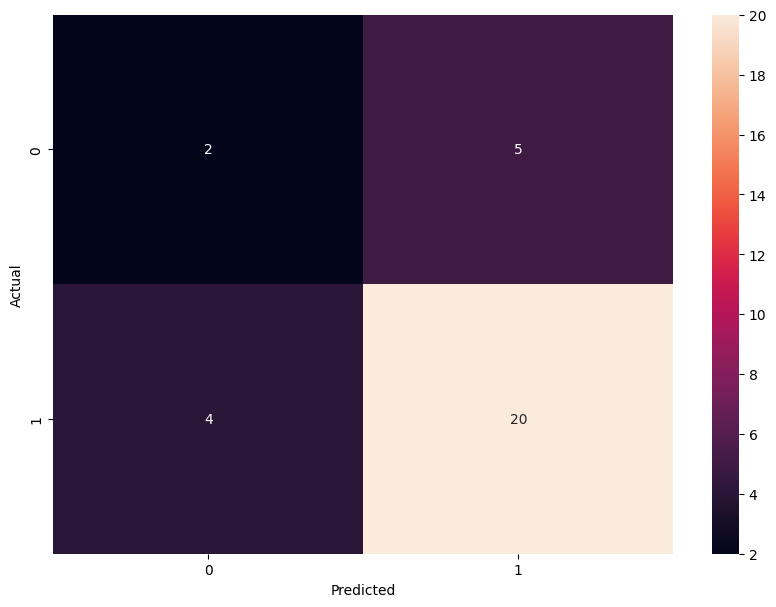

In [68]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')